In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns',None)
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack,csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
import os
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
train=pd.read_csv('drive/My Drive/TMDBdata/train.csv')
test=pd.read_csv('drive/My Drive/TMDBdata/test.csv')
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Text(0.5, 1.0, 'Distribution of log-transformed revenue')

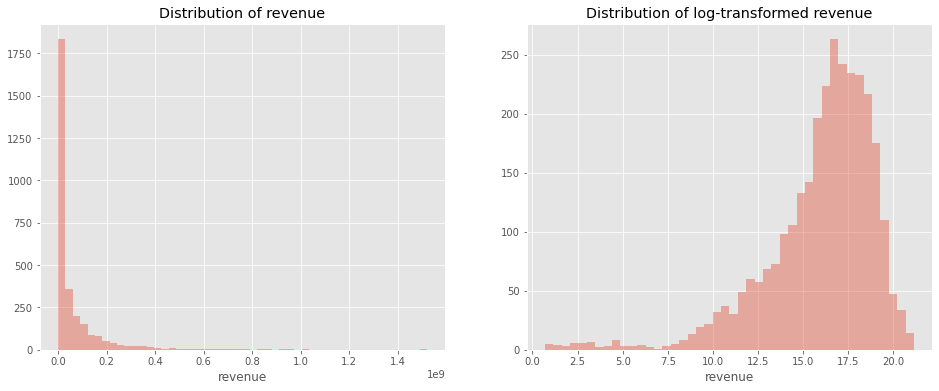

In [43]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train['revenue'],kde=False)
plt.title('Distribution of revenue')
plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),kde=False)
plt.title('Distribution of log-transformed revenue')

In [44]:
train['log_revenue']=np.log1p(train['revenue'])

Text(0.5, 1.0, 'log-transformed Revenue vs. log-transformed Budget')

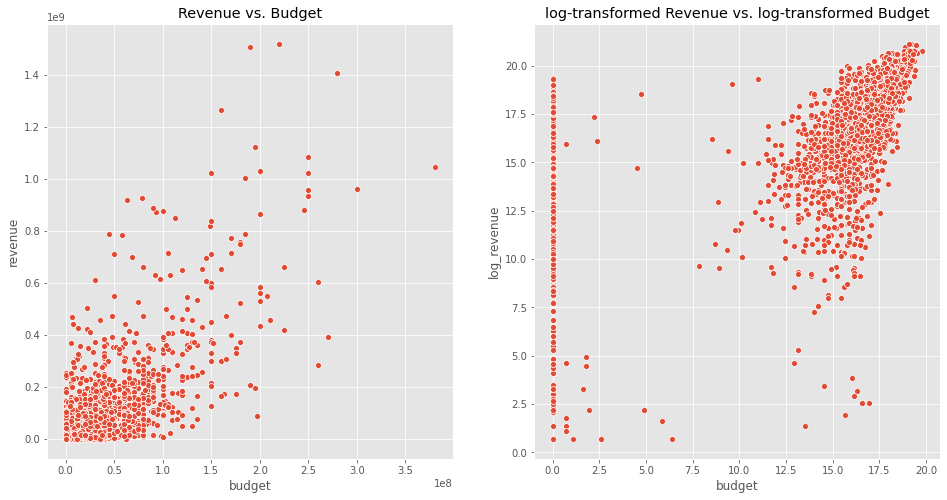

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'],train['revenue'])
plt.title('Revenue vs. Budget')
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(train['budget']),train['log_revenue'])
plt.title('log-transformed Revenue vs. log-transformed Budget')

In [46]:
train['log_budget']=np.log1p(train['budget'])
test['log_budget']=np.log1p(test['budget'])

In [47]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                         4
http://www.thehobbit.com/                                 2
http://www.lordoftherings.net/                            2
http://www.uip.de/lo/goodies/posters/pl_boogeyman.html    1
http://www.picturememovie.com/                            1
http://www.sennamovie.co.uk/                              1
http://www.katyperry.com/movie/                           1
https://www.facebook.com/PointBreakMovie                  1
http://www.dorothyofozthemovie.com/                       1
http://www.paranormalmovie.com/                           1
Name: homepage, dtype: int64

In [48]:
train['has_homepage']=0
train.loc[train['homepage'].isnull()==False,'has_homepage']=1
test['has_homepage']=0
test.loc[test['homepage'].isnull()==False,'has_homepage']=1

Text(0.5, 1.0, 'Revenue for files with and without a homepage')

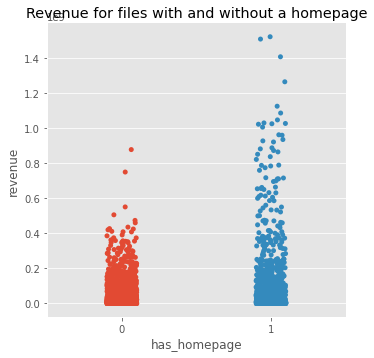

In [49]:
sns.catplot(x='has_homepage',y='revenue',data=train)
plt.title('Revenue for files with and without a homepage')

In [50]:
language_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

Text(0.5, 1.0, 'Mean log_revenue per language')

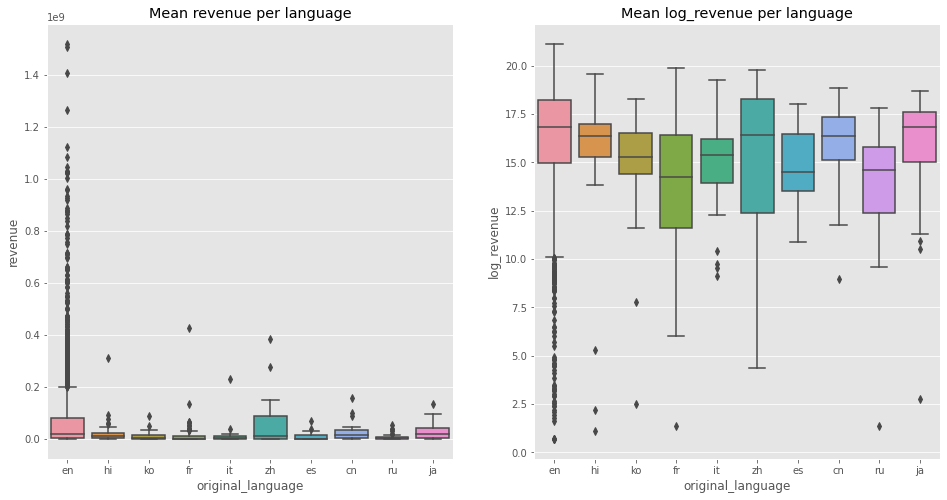

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=language_data)
plt.title('Mean revenue per language')
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y='log_revenue',data=language_data)
plt.title('Mean log_revenue per language')

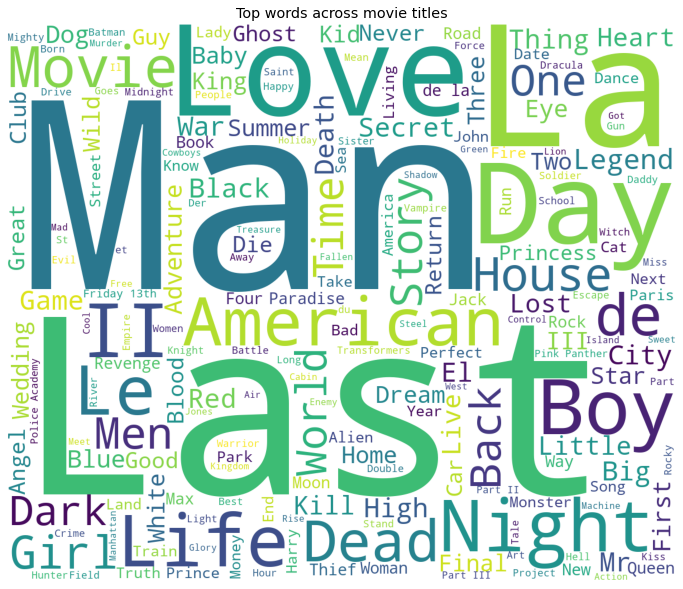

In [52]:
plt.figure(figsize=(12,12))
text=' '.join(train['original_title'].values)
wordcloud=WordCloud(max_font_size=None,
                    background_color='white',
                    width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie titles')
plt.axis('off')
plt.show()

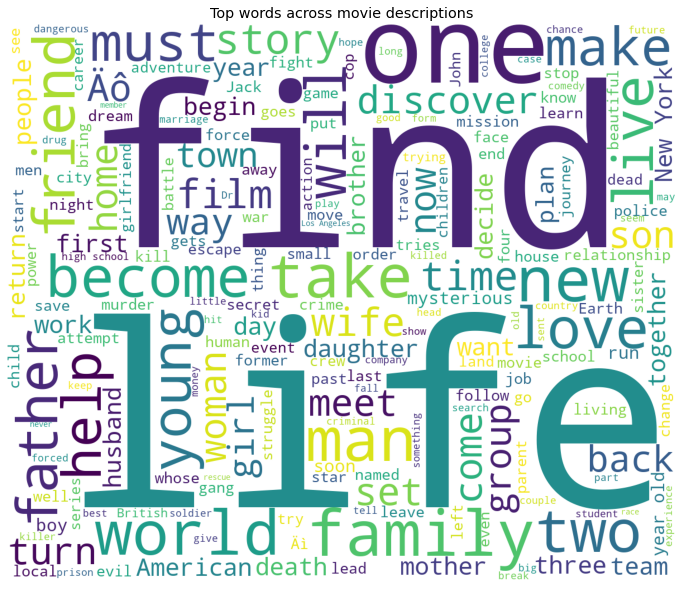

In [53]:
plt.figure(figsize=(12,12))
overview_text=' '.join(train['overview'].fillna('').values)
wordcloud=WordCloud(max_font_size=None,
                    background_color='white',
                    width=1200,height=1000).generate(overview_text)
plt.imshow(wordcloud)
plt.title('Top words across movie descriptions')
plt.axis('off')
plt.show()

In [54]:
!pip install eli5

In [55]:
import eli5
from sklearn.linear_model import LinearRegression

In [56]:
vectorizer=TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1,2),
    min_df=5
)
overview_text1=vectorizer.fit_transform(train['overview'].fillna(''))
linreg=LinearRegression()
linreg.fit(overview_text1,train['log_revenue'])
eli5.show_weights(linreg,vec=vectorizer,top=20,feature_filter=lambda x: x!='<BIAS>')

In [57]:
test.loc[test['release_date'].isnull()==False, 'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

In [58]:
def fix_date(x):
  year=x.split('/')[2]
  if int(year)<=19:
    return x[:-2]+'20'+year
  else:
    return x[:-2]+'19'+year

In [59]:
test.loc[test['release_date'].isnull()==True].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_budget,has_homepage
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,NaN,NaN,NaN,NaN,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN,0.0,0


In [60]:
test.loc[test['release_date'].isnull()==True,'release_date']='05/01/00'

In [61]:
train['release_date']=train['release_date'].apply(lambda x:fix_date(x))
test['release_date']=test['release_date'].apply(lambda x:fix_date(x))

In [62]:
train['release_date']=pd.to_datetime(train['release_date'])
test['release_date']=pd.to_datetime(test['release_date'])

In [63]:
def process_date(df):
  date_parts=['year','weekday','month','weekofyear','day','quarter']
  for part in date_parts:
    part_col='release_date'+'_'+part
    df[part_col]=getattr(df['release_date'].dt,part).astype(int)
  return df

train=process_date(train)
test=process_date(test)

In [64]:
d1=train['release_date_year'].value_counts().sort_index()
d2=test['release_date_year'].value_counts().sort_index()

In [70]:
d1.values

array([  1,   1,   2,   1,   2,   3,   1,   2,   3,   2,   1,   4,   1,
         4,   2,   3,   2,   2,   4,   2,   6,   2,   2,   4,   1,   6,
         6,   7,   4,   3,   3,   5,   8,   4,   5,   5,   6,   4,   7,
         8,   7,   6,   8,   8,   8,   9,   5,   8,   7,  11,  14,  16,
        21,  26,  25,  27,  30,  42,  44,  45,  56,  47,  46,  42,  45,
        56,  51,  62,  55,  63,  66,  65,  65,  77,  84,  74,  83,  99,
       114, 105, 101, 106, 126, 124, 125, 141, 123, 128, 125,  40])

In [75]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [76]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True)
data=[go.Scatter(x=d1.index,y=d1.values,name='train'),
      go.Scatter(x=d2.index,y=d2.values,name='test')]
layout=go.Layout(dict(title='No. of films per year',
                      xaxis=dict(title='Year'),
                      yaxis=dict(title='Count')),
                 legend=dict(orientation="v"))



fig = dict(data = data, layout = layout)
configure_plotly_browser_state()

iplot(fig)

In [80]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].sum()

data=[go.Scatter(x=d1.index,y=d1.values,name='film count'),
      go.Scatter(x=d2.index,y=d2.values,name='total revenue',yaxis='y2')]
layout=go.Layout(dict(title='No. of films and total revenue per year',
                      xaxis=dict(title='Year'),
                      yaxis=dict(title='Count'),
                      yaxis2=dict(title='total revenue',
                                  overlaying='y',
                                  side='right')),
                 legend=dict(orientation="v"))



fig = dict(data = data, layout = layout)
configure_plotly_browser_state()

iplot(fig)

In [81]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].mean()

data=[go.Scatter(x=d1.index,y=d1.values,name='film count'),
      go.Scatter(x=d2.index,y=d2.values,name='mean revenue',yaxis='y2')]
layout=go.Layout(dict(title='No. of films and mean revenue per year',
                      xaxis=dict(title='Year'),
                      yaxis=dict(title='Count'),
                      yaxis2=dict(title='mean revenue',
                                  overlaying='y',
                                  side='right')),
                 legend=dict(orientation="v"))



fig = dict(data = data, layout = layout)
configure_plotly_browser_state()

iplot(fig)

Text(0.5, 1.0, 'Revenue on different days of a week')

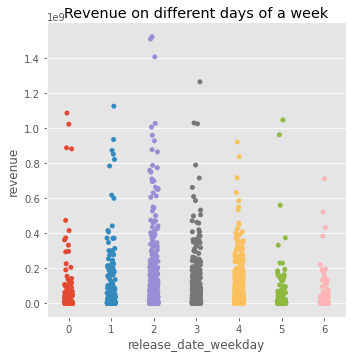

In [82]:
sns.catplot(x='release_date_weekday',y='revenue',data=train);
plt.title('Revenue on different days of a week')

Text(0.5, 1.0, 'Distribution of runtime')

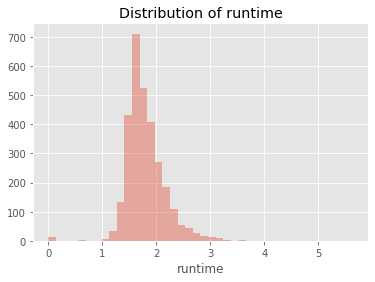

In [85]:
sns.distplot(train['runtime'].fillna(0)/60,bins=40,kde=False)
plt.title('Distribution of runtime')

Text(0.5, 1.0, 'Runtime vs. Revenue')

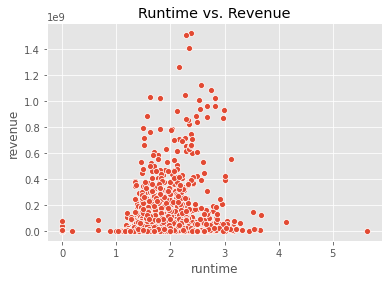

In [86]:
sns.scatterplot(train['runtime'].fillna(0)/60,train['revenue'])
plt.title('Runtime vs. Revenue')